# Statistics & Public Health 2: Data Analysis

## by Nicholas Kondis

![Mosquito and West Nile Virus](https://cst.brightspotcdn.com/dims4/default/23f5a2e/2147483647/strip/true/crop/1935x1290+33+0/resize/840x560!/format/webp/quality/90/?url=https%3A%2F%2Fcdn.vox-cdn.com%2Fthumbor%2F0HtkzQxFikEVic8QrZgNqP_feGQ%3D%2F0x0%3A2000x1290%2F2000x1290%2Ffilters%3Afocal%281000x645%3A1001x646%29%2Fcdn.vox-cdn.com%2Fuploads%2Fchorus_asset%2Ffile%2F24725590%2FWEST_NILE_COLO.JPG)

## Introduction

Since its first emergence of West Nile virus in the United States in Queens, New York in 1999 (Source CDC (1)), cases have been reported in all 48 of the contiguous United States (Source USGS (2)) to become the leading cause of mosquito-borne disease (Source CDC (1)).  West Nile virus infections typically begin at the onset of summer and continue through late fall.  Although 80% of infections are asymptomatic, 1 in 5 develop fever or other symptoms, and approximately 1 in 150 develop serious symptoms and fatalities.

West Nile Virus is most commonly spread to people by the bite of an infected mosquito.  In order to potential understand and manage the disease, many municipalities began data collection of mosquitos and their transmission of the disease.  The following is an analysis of data collected in the Chicago area between the years of 2007 and 2019.  The data focuses on quantification of mosquitos and commensurate analysis of mosquitos collected from various traps in the Chicago, Illinois area.



(1) Source: https://www.cdc.gov/westnile/ <br>
(2) Source: https://www.usgs.gov/faqs/where-united-states-has-west-nile-virus-been-detected-wildlife#:~:text=West%20Nile%20Virus%20has%20been,the%20Centers%20for%20Disease%20Control.

We will begin our analysis by importing some of the necessary python libraries.  Some libraries will also be imported later for specific analyses.

In [6]:
# Import the necessary libraries for datafrmae importing, analysis, and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# These will be used later for statisyical analysis
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# These will be used later for mathematical modeling and analysis
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


# This will be used to supress warning from from code to make the report more readable
import warnings


Next, we will begin our analysis by glimpsing the data and determining the types of data that is presented.

In [8]:
# Creating a dataframe and viewing the data
mosq_df = pd.read_csv('data/mosquito_data_part_2.csv')
mosq_df.head()

,Year,Week,Address Block,Trap,Trap type,Date,Mosquito number,WNV Present,Species,Lat,Lon,Month
0,2019,39,100XX W OHARE AIRPORT,T910,GRAVID,2019-09-26 00:09:00,2,negative,CULEX RESTUANS,41.977738,-87.880969,9
1,2019,39,52XX S KOLMAR AVE,T114,GRAVID,2019-09-26 00:09:00,1,negative,CULEX RESTUANS,41.798211,-87.736925,9
2,2019,39,58XX N WESTERN AVE,T028,GRAVID,2019-09-26 00:09:00,2,negative,CULEX RESTUANS,41.987245,-87.689417,9
3,2019,39,39XX N SPRINGFIELD AVE,T228,GRAVID,2019-09-26 00:09:00,1,negative,CULEX RESTUANS,41.953664,-87.724987,9
4,2019,39,131XX S BRANDON AVE,T209,GRAVID,2019-09-26 00:09:00,9,negative,CULEX RESTUANS,41.657069,-87.546049,9


In [9]:
# Examining the data types
print(mosq_df.dtypes)
mosq_df.describe()

Year                 int64
Week                 int64
Address Block       object
Trap                object
Trap type           object
Date                object
Mosquito number      int64
WNV Present         object
Species             object
Lat                float64
Lon                float64
Month                int64
dtype: object


,Year,Week,Mosquito number,Lat,Lon,Month
count,18495.000000,18495.000000,18495.000000,18495.000000,18495.000000,18495.000000
mean,2012.905812,31.004001,10.879913,41.852599,-87.712611,7.627088
std,3.725857,4.332020,13.475066,0.115419,0.095409,0.998079
min,2007.000000,20.000000,1.000000,41.644720,-87.880969,5.000000
25%,2010.000000,28.000000,2.000000,41.754148,-87.778235,7.000000
50%,2013.000000,31.000000,5.000000,41.872873,-87.703105,8.000000
75%,2016.000000,34.000000,14.000000,41.970102,-87.643076,8.000000
max,2019.000000,40.000000,50.000000,42.017801,-87.531051,10.000000


Our initial view of the data indicates some issues that should be addressed before continuing to a statistical analysis.  

First, the column labeled "Address Block" is unnecessary and is redundant to the more useful "Lat" and "Lon" (indicating geographic latitude and longitude locations), which are better indicators of location and much more capable of analysis and will, hence, be removed from the data.

In [11]:
# Removing "Adress Block"
mosq_df = mosq_df.drop(columns = ['Address Block'])

Next, let's take a closer look at any other deficiencies that may be in the data.

Here is a closer look at the data contained in the "Species" column.

In [13]:
mosq_df['Species'].value_counts()

Species
CULEX RESTUANS      11866
CULEX PIPIENS        5486
CULEX TERRITANS       917
CULEX SALINARIUS      226
Name: count, dtype: int64

This glimpse of the data indicates the species CULEX SALINARIUS represents a very small portion of the Species data and will likely be dropped from the dataframe.  Eliminating this will prevent multi-collinearity issues in later analyses.

In [15]:
mosq_df = pd.get_dummies(mosq_df, columns=['Species'], prefix='Species')

# Confirming the resulting DataFrame
mosq_df.head()

,Year,Week,Trap,Trap type,Date,Mosquito number,WNV Present,Lat,Lon,Month,Species_CULEX PIPIENS,Species_CULEX RESTUANS,Species_CULEX SALINARIUS,Species_CULEX TERRITANS
0,2019,39,T910,GRAVID,2019-09-26 00:09:00,2,negative,41.977738,-87.880969,9,False,True,False,False
1,2019,39,T114,GRAVID,2019-09-26 00:09:00,1,negative,41.798211,-87.736925,9,False,True,False,False
2,2019,39,T028,GRAVID,2019-09-26 00:09:00,2,negative,41.987245,-87.689417,9,False,True,False,False
3,2019,39,T228,GRAVID,2019-09-26 00:09:00,1,negative,41.953664,-87.724987,9,False,True,False,False
4,2019,39,T209,GRAVID,2019-09-26 00:09:00,9,negative,41.657069,-87.546049,9,False,True,False,False


In [16]:
# Drop Species_CULEX SALINARIUS column
mosq_df.drop(columns = ['Species_CULEX SALINARIUS'])

# Visualize to confirm dropped column
mosq_df.head()

,Year,Week,Trap,Trap type,Date,Mosquito number,WNV Present,Lat,Lon,Month,Species_CULEX PIPIENS,Species_CULEX RESTUANS,Species_CULEX SALINARIUS,Species_CULEX TERRITANS
0,2019,39,T910,GRAVID,2019-09-26 00:09:00,2,negative,41.977738,-87.880969,9,False,True,False,False
1,2019,39,T114,GRAVID,2019-09-26 00:09:00,1,negative,41.798211,-87.736925,9,False,True,False,False
2,2019,39,T028,GRAVID,2019-09-26 00:09:00,2,negative,41.987245,-87.689417,9,False,True,False,False
3,2019,39,T228,GRAVID,2019-09-26 00:09:00,1,negative,41.953664,-87.724987,9,False,True,False,False
4,2019,39,T209,GRAVID,2019-09-26 00:09:00,9,negative,41.657069,-87.546049,9,False,True,False,False


## Part 1 - Basic Analysis

### Question 1.1: 

Convert the WNV Present column into a binary column and create dummy variables from the Trap type column.

The next issue to be addressed is the column labeled "WNV Present" which is indicates as a string value.  We can examine the entries in this manner:

First, let's check the type of data used to describe "WNV Present".

In [21]:
# Check the datatype of "WNV Present"
mosq_df['WNV Present'].describe

<bound method NDFrame.describe of 0        negative
1        negative
2        negative
3        negative
4        negative
           ...   
18490    positive
18491    positive
18492    positive
18493    positive
18494    positive
Name: WNV Present, Length: 18495, dtype: object>

In [22]:
# First, check the data values in 'WNV Present'
mosq_df['WNV Present'].unique()

array(['negative', 'positive'], dtype=object)

Above, we can see the binary nature of the data in this column.

We will also check for any missing values in this column.

In [24]:
# # Check for missing values
mosq_df['WNV Present'].isna().sum()

0

Since there are no missing entries, we can procede with changing this binary string column to binary integers.

We will begin by defining a function for this purpose:

In [26]:
# Creating a function to convert 'positive' and 'negative' string values to 1 and 0

def convert_to_binary(present):
    if present == 'negative':
        return 0
    else:
        return 1

Next, we will apply the function to create the numeric (0 and 1) data.

In [28]:
# Applying the conversion function

mosq_df['WNV Present'] = mosq_df['WNV Present'].apply(convert_to_binary)

Next, we will check our data to make sure this conversion occured correctly and display the data to confirm the conversion.

In [30]:
# Confirming the conversion

mosq_df.head()

,Year,Week,Trap,Trap type,Date,Mosquito number,WNV Present,Lat,Lon,Month,Species_CULEX PIPIENS,Species_CULEX RESTUANS,Species_CULEX SALINARIUS,Species_CULEX TERRITANS
0,2019,39,T910,GRAVID,2019-09-26 00:09:00,2,0,41.977738,-87.880969,9,False,True,False,False
1,2019,39,T114,GRAVID,2019-09-26 00:09:00,1,0,41.798211,-87.736925,9,False,True,False,False
2,2019,39,T028,GRAVID,2019-09-26 00:09:00,2,0,41.987245,-87.689417,9,False,True,False,False
3,2019,39,T228,GRAVID,2019-09-26 00:09:00,1,0,41.953664,-87.724987,9,False,True,False,False
4,2019,39,T209,GRAVID,2019-09-26 00:09:00,9,0,41.657069,-87.546049,9,False,True,False,False


Since the beginning of the dataframe above is only showing 0 values, let'd do a quick sanity check to conform that there are some "1" entries included in the data.

In [32]:
#Making sure there are 1's in the column

mosq_df['WNV Present'].sum()

3994

Binary data conversion is confirmed.

### Question 1.1 Part 2

Create dummy variables from the Trap type column.

Next, we will convert the categorical values from the 'Trap type' to categorical values.

We begin by showing the values occurring in this column.

In [37]:
mosq_df['Trap type'].value_counts()

Trap type
GRAVID      17741
CDC           544
SENTINEL      209
OVI             1
Name: count, dtype: int64

To create dummy variable, we will employ the GetDummies function from the pandas library.  We will follow with the removal of the original 'Trap type' column.

In [39]:
# Using .get_dummies to create a new dataframe with binary dummy variable from "Trap type" in separate columns

encoded_df = pd.get_dummies(mosq_df['Trap type'], prefix='Trap')

# Concatenate the encoded DataFrame with the original DataFrame
mosq_df = pd.concat([mosq_df, encoded_df], axis=1)

# Removing the original "Trap type" column after creatin the dummy variables
mosq_df = mosq_df.drop(columns = ['Trap type'])

# Viewing the adjusted dataframe
mosq_df.head()

,Year,Week,Trap,Date,Mosquito number,WNV Present,Lat,Lon,Month,Species_CULEX PIPIENS,Species_CULEX RESTUANS,Species_CULEX SALINARIUS,Species_CULEX TERRITANS,Trap_CDC,Trap_GRAVID,Trap_OVI,Trap_SENTINEL
0,2019,39,T910,2019-09-26 00:09:00,2,0,41.977738,-87.880969,9,False,True,False,False,False,True,False,False
1,2019,39,T114,2019-09-26 00:09:00,1,0,41.798211,-87.736925,9,False,True,False,False,False,True,False,False
2,2019,39,T028,2019-09-26 00:09:00,2,0,41.987245,-87.689417,9,False,True,False,False,False,True,False,False
3,2019,39,T228,2019-09-26 00:09:00,1,0,41.953664,-87.724987,9,False,True,False,False,False,True,False,False
4,2019,39,T209,2019-09-26 00:09:00,9,0,41.657069,-87.546049,9,False,True,False,False,False,True,False,False


We will follow with the removal of Trap_OVI based on its single occurrence in the data and the prevention of multi-collinearity.  We will also display the data to confirm the removal.

In [41]:
mosq_df.drop(columns=['Trap_OVI'], inplace=True)

mosq_df.head()

,Year,Week,Trap,Date,Mosquito number,WNV Present,Lat,Lon,Month,Species_CULEX PIPIENS,Species_CULEX RESTUANS,Species_CULEX SALINARIUS,Species_CULEX TERRITANS,Trap_CDC,Trap_GRAVID,Trap_SENTINEL
0,2019,39,T910,2019-09-26 00:09:00,2,0,41.977738,-87.880969,9,False,True,False,False,False,True,False
1,2019,39,T114,2019-09-26 00:09:00,1,0,41.798211,-87.736925,9,False,True,False,False,False,True,False
2,2019,39,T028,2019-09-26 00:09:00,2,0,41.987245,-87.689417,9,False,True,False,False,False,True,False
3,2019,39,T228,2019-09-26 00:09:00,1,0,41.953664,-87.724987,9,False,True,False,False,False,True,False
4,2019,39,T209,2019-09-26 00:09:00,9,0,41.657069,-87.546049,9,False,True,False,False,False,True,False


Above, we can see that the dummy variables were created appropriately and we can now remove the original "Trap type" column, and we have confirm the removal of the original "Trap type" column.  Additionally, the column values have been adjusted to numeric equivalents, 0 and 1, for later mathematical analysis.

### Modifying the 'Date' column

Before continuing, we will make a further modification of the data by addressing the "Date" column which, as was indicated by our initial analysis, is in a string format, a format which is not useful for mathematical modeling.

We will convert this data to the appropriate datetime format and extract the month and put in a column called "Month'.

In [46]:
# Since Date is a string, we will convert to datetime format
mosq_df['Date'] = pd.to_datetime(mosq_df['Date'])  

# Create a new column 'Month' with the extracted months
mosq_df['Month'] = mosq_df['Date'].dt.month

Since 'Month' is now indicated by integer values, which is useful for analysis but harder to visually interpret for the reader, we will also add a column for the names of the months to be used in data presentation.

To accomplish this, we will create a month_names dictionary, apply it to the "Month" column to create a new column called "Month_names".

In [48]:
# Creating a dictionary for labeling the 'Month'
month_names = {5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October'}

# Applying the labeling dictionary
mosq_df['Month_names'] = mosq_df['Month'].map(month_names)

# Confirm creation of "Month_names"
mosq_df.head()

,Year,Week,Trap,Date,Mosquito number,WNV Present,Lat,Lon,Month,Species_CULEX PIPIENS,Species_CULEX RESTUANS,Species_CULEX SALINARIUS,Species_CULEX TERRITANS,Trap_CDC,Trap_GRAVID,Trap_SENTINEL,Month_names
0,2019,39,T910,2019-09-26 00:09:00,2,0,41.977738,-87.880969,9,False,True,False,False,False,True,False,September
1,2019,39,T114,2019-09-26 00:09:00,1,0,41.798211,-87.736925,9,False,True,False,False,False,True,False,September
2,2019,39,T028,2019-09-26 00:09:00,2,0,41.987245,-87.689417,9,False,True,False,False,False,True,False,September
3,2019,39,T228,2019-09-26 00:09:00,1,0,41.953664,-87.724987,9,False,True,False,False,False,True,False,September
4,2019,39,T209,2019-09-26 00:09:00,9,0,41.657069,-87.546049,9,False,True,False,False,False,True,False,September


### Question 1.2: 

#### What is the average number of mosquitoes for each month?

As the question is a bit ambiguous to whether we are seeking the average number of mosquitos trapped in all months of the study or the average number of mosquitos for each month, so we will address both questions.

We begin by constructing a new dataframe and use the new dataframe to visualize the average number of mosquitos in each month.


First, let's determine which months are represented in our mosquito data frame:

In [53]:
mosq_df['Month'].unique()

array([ 9,  8,  7,  6, 10,  5])

This indicates that only the months May (represented by integer 5) through October (represented by integer 10) are included in the data.  To make the visualizations clearer as we continue our analysis, we will create 2 dictionaries that can be used to map the names of the months to our visualizations making them more readable.

The purpose for the names_month_short is to allow for abbreviated month names for smaller, more compact visualization.


In [55]:
# This dictionary will be used for the smaller plots to allow a better fir and more readability
month_names_short = {5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sept', 10: 'Oct'}

Next, we will create a dataframe that is restricted to those months represented in the data.

To find the average number of mosquitos per month, we will first create a function that sums the total number of mosquitos per month and returns these values in a dataframe.  Although creating a dataframe may seem to be a superfluous step, it provides two advantages. First, it will allow us to exclude months without data. Second, it will be useful for composite plots used later in this analysis.  

It should be noted here that some years in our data do not contain data for May or October so these months must be explicitly omitted.

In [58]:
# Creat a function that returns a dataframe with the sum of mosquitos for each month

def sum_mosquitoes_by_month(dataframe, months):
    # Initialize output list
    sum_mosquitoes = []
    
    for month in months:
        # Filter the dataframe for the specified month
        month_data = dataframe[dataframe['Month'] == month]
        
        # Initialize a list to store the sum of mosquito number for each year
        sum_mosquitoes_per_year = []
        
        # Iterate through each year and calculate the sum of Mosquito number
        for year in range(dataframe['Year'].min(), dataframe['Year'].max() + 1):
            year_data = month_data[month_data['Year'] == year]
            sum_mosquitoes_per_year.append(year_data['Mosquito number'].sum())
        
        # Add the list of sum values for the month to the main list
        sum_mosquitoes.append(sum_mosquitoes_per_year)
    
    # Create a DataFrame from the list of lists
    sum_mosquitoes_df = pd.DataFrame(sum_mosquitoes, columns=range(dataframe['Year'].min(), dataframe['Year'].max() + 1), index=months)
    
    return sum_mosquitoes_df

# Create a list of unique vales from "Month" column
months = mosq_df['Month'].unique().tolist()
sum_mosquitoes_df = sum_mosquitoes_by_month(mosq_df, months)
sum_mosquitoes_df.reset_index
sum_mosquitoes_df.head()

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
9,3521,583,450,819,1146,782,6329,4163,690,7949,1290,517,816
8,18936,1412,675,2026,1231,3522,8338,13208,3758,16839,4995,5674,2615
7,1376,1426,2245,3655,3286,5936,7685,8315,5300,9903,3153,4717,2010
6,307,461,1992,1583,2132,1102,2372,4028,2015,2202,1194,4630,4589
10,924,0,80,32,0,0,0,174,0,0,0,0,0


In [59]:
# Add a column with the sum of each row
sum_mosquitoes_df['Sum'] = sum_mosquitoes_df.sum(axis=1)

# Add a column that has the number of non-zero values in each row
sum_mosquitoes_df['NonZeroCount'] = sum_mosquitoes_df.astype(bool).sum(axis=1)

# Add a column that divides the sum of each row by the number of non-zero entries in each row
sum_mosquitoes_df['Average'] = sum_mosquitoes_df['Sum'] / sum_mosquitoes_df['NonZeroCount']

# Display the updated DataFrame
sum_mosquitoes_df.head(6)

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Sum,NonZeroCount,Average
9,3521,583,450,819,1146,782,6329,4163,690,7949,1290,517,816,29055,14,2075.357143
8,18936,1412,675,2026,1231,3522,8338,13208,3758,16839,4995,5674,2615,83229,14,5944.928571
7,1376,1426,2245,3655,3286,5936,7685,8315,5300,9903,3153,4717,2010,59007,14,4214.785714
6,307,461,1992,1583,2132,1102,2372,4028,2015,2202,1194,4630,4589,28607,14,2043.357143
10,924,0,80,32,0,0,0,174,0,0,0,0,0,1210,5,242.000000
5,30,0,86,0,0,0,0,0,0,0,0,0,0,116,3,38.666667


In [60]:
sum_mosquitoes_df.head()


,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Sum,NonZeroCount,Average
9,3521,583,450,819,1146,782,6329,4163,690,7949,1290,517,816,29055,14,2075.357143
8,18936,1412,675,2026,1231,3522,8338,13208,3758,16839,4995,5674,2615,83229,14,5944.928571
7,1376,1426,2245,3655,3286,5936,7685,8315,5300,9903,3153,4717,2010,59007,14,4214.785714
6,307,461,1992,1583,2132,1102,2372,4028,2015,2202,1194,4630,4589,28607,14,2043.357143
10,924,0,80,32,0,0,0,174,0,0,0,0,0,1210,5,242.000000


In [61]:
# Create a new DataFrame from the index and last column of the original DataFrame
month_avg_df = pd.DataFrame({'Index': sum_mosquitoes_df.index, 'Average_mosquitos': sum_mosquitoes_df.iloc[:, -1]})

# Set a new index for the new DataFrame
month_avg_df = month_avg_df.set_index('Index')

# Display the shortened dataframe
month_avg_df.head()

,Average_mosquitos
Index,
9,2075.357143
8,5944.928571
7,4214.785714
6,2043.357143
10,242.000000


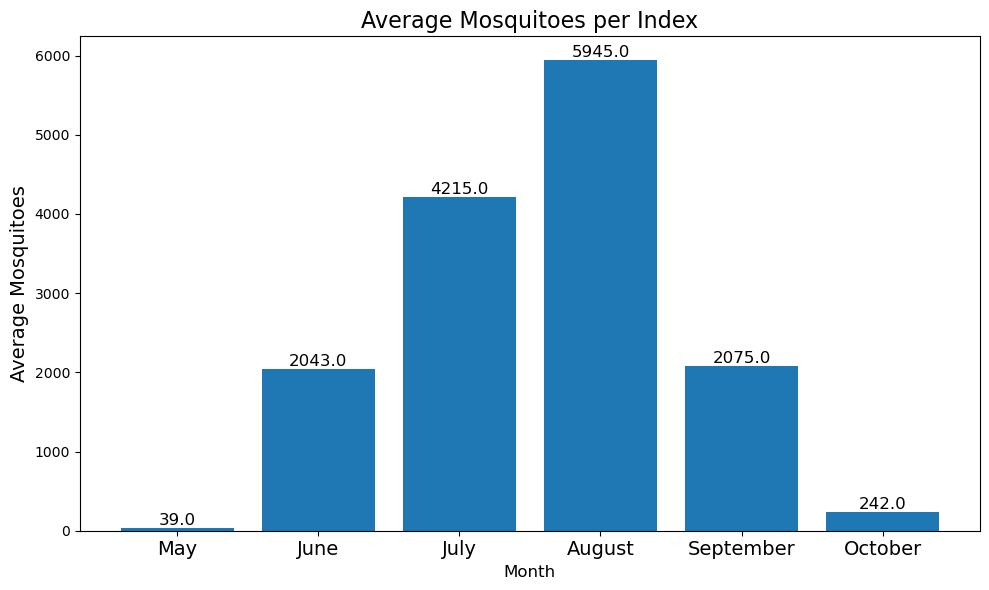

In [62]:
# Plotting the bar graph
plt.figure(figsize = (10, 6))
bars = plt.bar(month_avg_df.index, month_avg_df['Average_mosquitos'])

plt.bar_label(bars, labels = round(month_avg_df['Average_mosquitos'], 0), fontsize = 12)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Mosquitoes', fontsize=  14)
plt.title('Average Mosquitoes per Index', fontsize = 16)
plt.xticks(months, [month_names[month] for month in months], fontsize = 14)
plt.tight_layout()
plt.show()

Since the graph above uses the average number of mosquitos for a given month in all years included in the study, it would be more useful to see these averages for each year. This is particularly important because some years in the study do not include data for May or October.  

The bar graphs above indicate peak occurrences occur of mosquitos (implied by higher numbers of mosquitos in traps) occur in late summer.  This implies some external factor mat affect the average number of mosquitos.  Although, precipitation and daylight cycles are potential candidates, in this study we will consider temperature. This will be explored later in this report.

To explore the possible significance of temperature and mosquito number, we will look at the mean temperatures in Chicago for the years in the data.  To this we will include information about the mean temperatures in Chicago from May to October in the years 2007 to 2019 (created in a new dataframe below).


The temperature data was sourced from (https://www.weather.gov/lot/Annual_Temperature_Rankings_Chicago)

In [67]:
# Creating a dataframe of averge temperatures in Chicago for the period included in the data 

temperature_data = {
    'Year': list(range(2007, 2020)),
    
    'May': [51.5, 48.7, 48.7, 51.5, 50.7, 54.5, 49.1, 47.5, 50.0, 52.3, 52.6, 50.9, 49.6],
    'June': [71.4, 70.8, 67.6, 71.2, 69.5, 74.0, 68.5, 70.9, 67.4, 71.6, 72.4, 71.5, 67.8],
    'July': [73.7, 74.0, 69.4, 77.7, 79.0, 81.1, 73.2, 70.4, 72.3, 75.5, 74.6, 76.2, 77.1],
    'August': [74.8, 72.7, 70.5, 76.7, 73.5, 73.3, 73.0, 73.7, 71.8, 75.8, 71.5, 76.3, 72.9],
    'September': [68.1, 66.2, 65.4, 65.2, 62.2, 64.1, 67.2, 63.9, 69.0, 69.6, 69.4, 68.9, 69.4],
    'October': [59.0, 52.7, 48.9, 56.0, 54.9, 51.5, 53.1, 52.0, 54.7, 56.9, 57.6, 52.7, 50.9]
}

# Create a DataFrame
chicago_temps_df = pd.DataFrame(temperature_data)

# Set the 'Year' column as the index
chicago_temps_df.set_index('Year', inplace=True)


chicago_temps_df.head()
        
#Source (https://www.weather.gov/lot/Annual_Temperature_Rankings_Chicago)

,May,June,July,August,September,October
Year,,,,,,
2007,51.5,71.4,73.7,74.8,68.1,59.0
2008,48.7,70.8,74.0,72.7,66.2,52.7
2009,48.7,67.6,69.4,70.5,65.4,48.9
2010,51.5,71.2,77.7,76.7,65.2,56.0
2011,50.7,69.5,79.0,73.5,62.2,54.9


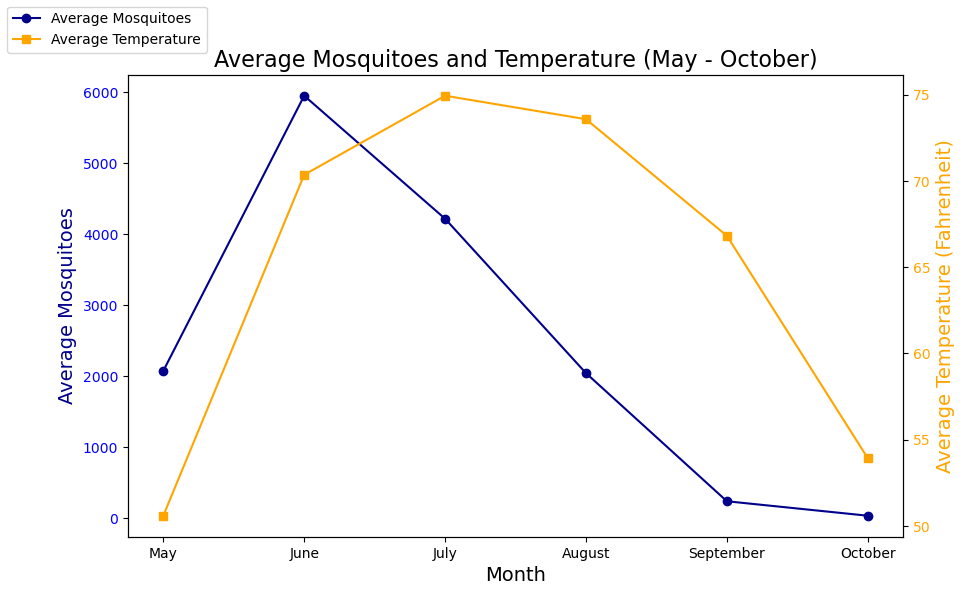

In [68]:
# Columns for Chicago temperatures
chicago_temp_cols = chicago_temps_df.columns.tolist()

# Index for month_avg_df
months = list(range(5, 11))

# Sort the columns of chicago_temps_df
chicago_temps_df_sorted = chicago_temps_df[chicago_temp_cols]

# Plotting
fig, ax1 = plt.subplots(figsize = (10, 6))

# Plot the average mosquitoes
ax1.plot(months, month_avg_df['Average_mosquitos'], marker = 'o', color = 'darkblue', label = 'Average Mosquitoes')
ax1.set_xlabel('Month', fontsize = 14)
ax1.set_ylabel('Average Mosquitoes', color = 'darkblue', fontsize = 14)
ax1.tick_params(axis = 'y', labelcolor = 'blue')

# Create secondary y-axis (right side) for Chicago temperatures
ax2 = ax1.twinx()
ax2.plot(months, chicago_temps_df_sorted.mean(), marker = 's', color = 'orange', label = 'Average Temperature')
ax2.set_ylabel('Average Temperature (Fahrenheit)', color = 'orange', fontsize = 14)
ax2.tick_params(axis='y', labelcolor='orange')

# Set xticks labels with month_names dict
plt.xticks(months, [month_names[month] for month in months])

plt.title('Average Mosquitoes and Temperature (May - October)', fontsize = 16)
fig.legend(loc = 'upper left')

plt.show()


In [69]:
# Calculate the correlation coefficient
# Since values are a list, use np.corrcoef()
correlation = np.corrcoef(month_avg_df['Average_mosquitos'], chicago_temps_df_sorted.mean())[0, 1]

print("Correlation coefficient:", round(correlation, 4))


Correlation coefficient: 0.5131


A correlation of 0.513 is, in statistical terms, "large strength" and indicates that temperature, possibly in conjunction with other variables, is a good predictor of mosquitos (based on the assumption that the number of mosquitos trapped is a representative sample of total mosquito population in the Chicago area).

On implication of this is that, if the general trend of increase in global temperatures continues, West Nile virus will likely continue increased prevalence.

## Part 2 - Statistical Analysis

### Question 2.1

Is there a statistically significant difference between the different mosquito species when looking at the occurrence of West Nile Virus?

To help understand if there is a significant difference between different species of mosquitos and the occurrence of the West Nile virus, let’s examine the nature of the data.   Specifically, we will examine what information is in the data and how the information is presented.

Next, we will confirm how the data for the presence of West Nile is presented.

In [75]:
# Checking the unique values of WNV Present 
mosq_df['WNV Present'].unique()

array([0, 1], dtype=int64)

These values allow for an straightforward calculation of the frequency of occurrence of each species per trap.

In [77]:
CR_count = (mosq_df['Species_CULEX PIPIENS'] * mosq_df["Mosquito number"]).mean()
CT_count = (mosq_df['Species_CULEX TERRITANS'] * mosq_df["Mosquito number"]).mean()
CP_count = (mosq_df['Species_CULEX PIPIENS'] * mosq_df["Mosquito number"]).mean()

print("The average number per trap of the CULEX RESTUANS species is "+ str(CR_count))
print("The average number per trap of the CULEX TERRITANS species is "+ str(CT_count))
print("The average number per trap of the CULEX PIPIENS species is "+ str(CP_count))


The average number per trap of the CULEX RESTUANS species is 3.31786969451203
The average number per trap of the CULEX TERRITANS species is 0.09786428764530955
The average number per trap of the CULEX PIPIENS species is 3.31786969451203


Because of the low occurrence of CULEX TERRITAN per trap, this species is likely a less reliable as a metric for West Nile virus because small anomalies would create large errors in the calculation of occurrence of West Nile virus.

Now, let's look at the frequency of occurrence of West Nile Virus when each species is present.  (Note, this information describes the occurrence on the virus without consideration of the number of a particular species that was present.)

In [80]:
# Recreating original dataframe to use the previously removed 'Species' column
mosq_temp_df = pd.read_csv('data/mosquito_data_part_2.csv')
mosq_temp_df['WNV Present'] = mosq_temp_df['WNV Present'].apply(convert_to_binary)

# Grouping by 'Species' and calculating the average of 'WNV_Present'
avg_by_species = mosq_temp_df.groupby('Species')['WNV Present'].mean()

# Print the result
print(avg_by_species)


Species
CULEX PIPIENS       0.257382
CULEX RESTUANS      0.215490
CULEX SALINARIUS    0.048673
CULEX TERRITANS     0.015267
Name: WNV Present, dtype: float64


To reiterate, this table describes the frequency of West Nile Virus whenever some quantity of a particular species occurs in the trap, not the incidence per mosquito.  These proportions should not be equivocated to the frequency of occurrence of the virus per mosquito.

Determining the occurrence of West Nile Virus per mosquito will require some manipulation of the data and will be done later in this report.

Next, let's look at the average number of each species of mosquito per trap.  This can help develop insight into the occurrence of West Nile virus per mosquito for each species.

In [83]:
# Grouping by 'Species' and calculating the average of 'WNV_Present'
avg_number_by_species = mosq_temp_df.groupby('Species')['Mosquito number'].mean()

# Print the result
print(avg_number_by_species)

Species
CULEX PIPIENS       11.185563
CULEX RESTUANS      11.594977
CULEX SALINARIUS     2.053097
CULEX TERRITANS      1.973828
Name: Mosquito number, dtype: float64


To clarify the information in the dataframe, we will check to see if multiple species occur in the same traps.

In [85]:
# Grouping the DataFrame by 'Trap' and applying a function to check for unique species
trap_species = mosq_temp_df.groupby('Trap')['Species'].apply(lambda x: ', '.join(sorted(set(x))))

# Resetting the index to transform the grouped series into a DataFrame
trap_species = trap_species.reset_index()

# Sorting the DataFrame based on the 'Trap' column
trap_species_sorted = trap_species.sort_values(by='Trap')

trap_species.head()

,Trap,Species
0,220A,"CULEX PIPIENS, CULEX RESTUANS"
1,T001,"CULEX PIPIENS, CULEX TERRITANS"
2,T002,"CULEX PIPIENS, CULEX RESTUANS, CULEX SALINARIU..."
3,T002A,"CULEX PIPIENS, CULEX RESTUANS, CULEX TERRITANS"
4,T002B,"CULEX PIPIENS, CULEX RESTUANS"


This indicates that the dataframe has separate rows for different species found in the same trap.

This can be better described in a pivot table.

In [88]:
# Seeing the number of each species found in each trap
# Create a pivot table
pivot_table = mosq_temp_df.pivot_table(index = 'Trap', columns = 'Species', values = 'Mosquito number', aggfunc = 'sum')

# Replace NaN values with 0
pivot_table = pivot_table.fillna(0)

# Convert pivot table to DataFrame for easier viewing
df_from_pivot = pivot_table.reset_index()

df_from_pivot.head()

Species,Trap,CULEX PIPIENS,CULEX RESTUANS,CULEX SALINARIUS,CULEX TERRITANS
0,220A,6.0,11.0,0.0,0.0
1,T001,10.0,0.0,0.0,1.0
2,T002,2878.0,6390.0,11.0,6.0
3,T002A,21.0,15.0,0.0,2.0
4,T002B,17.0,2.0,0.0,0.0


The pivot table dataframe above shows that multiple species of mosquito are, in fact, occurring in each trap, and the data presents these as separate rows.

To determine the frequency of virus per mosquito, a more direct answer to the question "Is there a statistically significant difference between the different mosquito species when looking at the occurrence of West Nile Virus?", we will employ logistic regression:

In [91]:
# Here we are defining a function to calculate the ratio of traps in which WNV is detected from
# the total, which will be used for each species of mosquito

# Creating a function to determine the ratio of West Nile Virus per species
# This function will be imployed in the logistic model
def calculate_ratio(group_data):
    # Filter the group to select rows where 'Mosquito number' is equal to 1, WNV is present
    mosquito_number_1 = group_data[group_data['Mosquito number'] == 1]

    # Count the number of rows where 'WNV Present' is equal to 1
    wnv_present_1 = mosquito_number_1[mosquito_number_1['WNV Present'] == 1].shape[0]

    # Calculate the total number of occurrences where 'Mosquito number' is 1 within the group
    total_occurrences = mosquito_number_1.shape[0]

    # Calculate the ratio of occurrences where 'WNV Present' equals 1 to the total number of occurrences where 'Mosquito number' is 1
    # Note: although it is known that total_occurences of each species is greater than 0,
    # the conditional statement preventing 0 denominators is included to prevent warnings in Jupyter
    ratio = wnv_present_1 / total_occurrences if total_occurrences > 0 else 0
    
    return ratio

# In this step we group the dataframe by "Species"
grouped_by_species = mosq_temp_df.groupby('Species')

# Initializing an empty list to store the results
results_list = []

# Dictionary to store decision thresholds for each species
thresholds = {}  

# Dictionary to store logistic coffeicients for each species
coefficients = {}

# Iterating over each group (species) and calculate the ratio
for species, group_data in grouped_by_species:
    ratio = calculate_ratio(group_data)
    results_list.extend([{'Species': species, 'Ratio': ratio}] * len(group_data))

# Create a DataFrame of results
ratios_df = pd.DataFrame(results_list)

# Perform logistic regression for each species
results = {}
for species, group_data in grouped_by_species:
    # Assigning X and y for the logistic regression
    X = pd.DataFrame({'Ratio': ratios_df[ratios_df['Species'] == species]['Ratio']})
    y = group_data['WNV Present']
    
    # Split the data into training and testing sets, 80-20 split
    # Random state is included for reproducibility
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)
    
    # Train the logistic regression model
    model = LogisticRegression()
    # Fitting the logistic regression model
    model.fit(X_train, y_train)

    # Store the coefficients in a dictionary
    coefficients[species] = model.coef_[0]
    
    # Predictions on the test set
    y_pred = model.predict(X_test)

    # Predicted probabilities on the test set
    y_pred_proba = model.predict_proba(X_test)

    # Here, we'll use a threshold of 0.5, indicating that we are looking for a probability of at least 0.5
    # to assign a positive occurence of West Nile Virus
    threshold = 0.5
    
    # Store the threshold for the current species
    thresholds[species] = threshold
    
    # Convert probabilities to binary predictions based on the threshold
    y_pred_threshold = (y_pred_proba[:, 1] >= threshold).astype(int)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    
    # Adjusted with zero_division parameter to prevent warnings
    classification_rep = classification_report(y_test, y_pred, zero_division = 1)  
    confusion_mat = confusion_matrix(y_test, y_pred)
    
    # Store results in the dictionary
    results[species] = {
        'Model': model,
        'Accuracy': accuracy,
        'Classification Report': classification_rep,
        'Confusion Matrix': confusion_mat,
        'Threshold': threshold
    }

# Print results for each species
for species, result in results.items():
    print(f"\nSpecies: {species}")
    print("Accuracy:", result['Accuracy'])
    print("Classification Report:")
    print(result['Classification Report'])
    print("Confusion Matrix:")
    print(result['Confusion Matrix'])



Species: CULEX PIPIENS
Accuracy: 0.7331511839708561
Classification Report:
              precision    recall  f1-score   support

           0       0.73      1.00      0.85       805
           1       1.00      0.00      0.00       293

    accuracy                           0.73      1098
   macro avg       0.87      0.50      0.42      1098
weighted avg       0.80      0.73      0.62      1098

Confusion Matrix:
[[805   0]
 [293   0]]

Species: CULEX RESTUANS
Accuracy: 0.7864363942712721
Classification Report:
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      1867
           1       1.00      0.00      0.00       507

    accuracy                           0.79      2374
   macro avg       0.89      0.50      0.44      2374
weighted avg       0.83      0.79      0.69      2374

Confusion Matrix:
[[1867    0]
 [ 507    0]]

Species: CULEX SALINARIUS
Accuracy: 0.9782608695652174
Classification Report:
              precision    r

### Explaining and interpreting the results of the logisitc regressions:

Since the analysis above suggests our model has good predictive power, we will employ this model to estimate the occurrence of the virus per mosquito and per species:

In [94]:
# Define a function to calculate the probability of WNV presence for each species
def calculate_probability(group_data):
    # Filter the group to select rows where 'Mosquito number' is equal to 1
    mosquito_number_1 = group_data[group_data['Mosquito number'] == 1]

    # Count the number of rows where 'WNV Present' is equal to 1
    wnv_present_1 = mosquito_number_1[mosquito_number_1['WNV Present'] == 1].shape[0]

    # Calculate the total number of occurrences where 'Mosquito number' is 1 within the group
    total_occurrences = mosquito_number_1.shape[0]

    # Calculate the probability of WNV presence
    # If statement is included to prevent warnigs
    probability = wnv_present_1 / total_occurrences if total_occurrences > 0 else 0

    return probability

# Group the dataframe by "Species"
grouped_by_species = mosq_temp_df.groupby('Species')

# Initialize an empty dictionary to store the probabilities
probabilities = {}

# Iterate over each group (species) and calculate the probability
for species, group_data in grouped_by_species:
    probability = calculate_probability(group_data)
    probabilities[species] = probability

# Print probabilities for each species
for species, probability in probabilities.items():
    print(f"Species: {species}, Probability of WNV Presence: {probability}")


Species: CULEX PIPIENS, Probability of WNV Presence: 0.05187074829931973
Species: CULEX RESTUANS, Probability of WNV Presence: 0.037261294829995344
Species: CULEX SALINARIUS, Probability of WNV Presence: 0.032679738562091505
Species: CULEX TERRITANS, Probability of WNV Presence: 0.01804511278195489


The data above gives a calculated estimate of the virus per mosquito (in contrast to the ratio_by_species data earlier which only addressed the occurrence of the West Nile virus when multiple mosquitos were present).


For clarification, the previous data given by "ratio_by_species" would represent a binary distribution of the occurrence of the virus based on the probabilities directly above. 

This explains the higher ratios indicated by "ratio_by_species".

### Question 2.2

Which columns are positively correlated with the number of mosquitoes caught? Which columns are negatively correlated? Are these correlations statistically significant?

Correlations between columns are easily visualized using a heatmap.

To explicitly see these values, we will manipulate and print the correlation matrix.

Only printed values with positive correlations greater than 0.4 (descending) or negative correlations less that -0.4 (ascending) will be printed as we are only concerned with significant values.

Additional, self-correlation values (whose values are necessarily 1 or -1) have been removed as they do not contain useful information for our analysis.

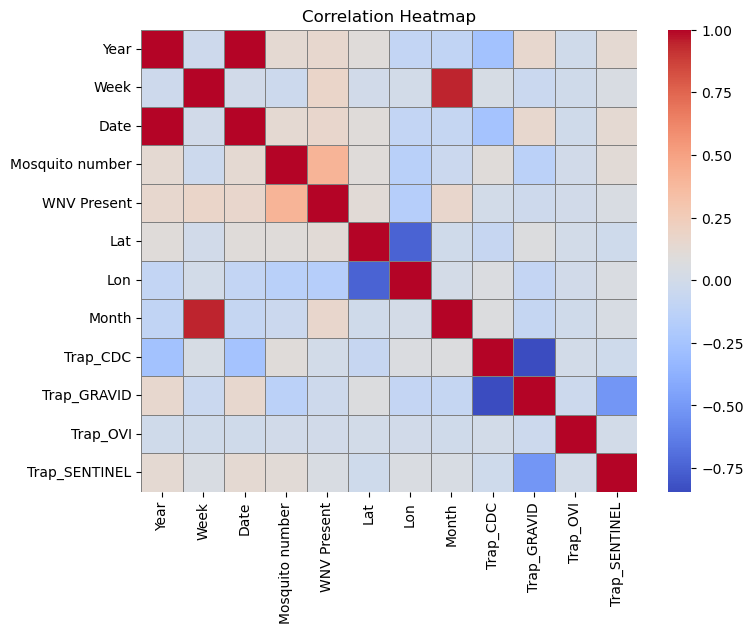

In [102]:
# Make a copy of the data for creating a heatmap
mosq_heat = mosq_temp_df.copy()

mosq_heat['Date'] = pd.to_datetime(mosq_heat['Date'])

encoded_2_df = pd.get_dummies(mosq_heat['Trap type'], prefix='Trap')

# Concatenate the encoded DataFrame with the original DataFrame
mosq_heat = pd.concat([mosq_heat, encoded_2_df], axis=1)

# Create a new column 'Month' with the extracted months
mosq_heat['Month'] = mosq_heat['Date'].dt.month

# Remove unnecessary (non-numeric, non-categorical) columns
mosq_heat = mosq_heat.drop(columns = ['Trap', 'Species', 'Address Block', 'Species', 'Trap type'])

# Compute the correlation matrix
corr_matrix = mosq_heat.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, cmap='coolwarm', linewidths=.5, linecolor='grey')
plt.title('Correlation Heatmap')
plt.show()



In [103]:
# Printing a correlation report
# Filter out diagonal elements (correlations of 1)
corr_matrix_no_diag = corr_matrix.mask(np.eye(len(corr_matrix), dtype = bool))

# Unstack the correlation matrix into a Series and drop NaN values
corr_series = corr_matrix_no_diag.unstack()

# Sort the correlations in descending order for values greater than 0.4
sorted_corr_gt_04_desc = corr_series[corr_series > 0.4].sort_values(ascending = False)

# Sort the correlations in ascending order for values less than -0.4
sorted_corr_lt_minus04_asc = corr_series[corr_series < -0.4].sort_values()

# Print correlations greater than 0.4 in descending order
print("Correlations greater than 0.4 (descending):")
for (col1, col2), correlation in sorted_corr_gt_04_desc.items():
    print(f"Correlation between {col1} and {col2}: {correlation:.4f}")

# Print correlations less than -0.4 in ascending order
print("\nCorrelations less than -0.4 (ascending):")
for (col1, col2), correlation in sorted_corr_lt_minus04_asc.items():
    print(f"Correlation between {col1} and {col2}: {correlation:.4f}")


Correlations greater than 0.4 (descending):
Correlation between Year and Date: 0.9998
Correlation between Date and Year: 0.9998
Correlation between Week and Month: 0.9489
Correlation between Month and Week: 0.9489
Correlation between Mosquito number and WNV Present: 0.4080
Correlation between WNV Present and Mosquito number: 0.4080

Correlations less than -0.4 (ascending):
Correlation between Trap_CDC and Trap_GRAVID: -0.8444
Correlation between Trap_GRAVID and Trap_CDC: -0.8444
Correlation between Lat and Lon: -0.7494
Correlation between Lon and Lat: -0.7494
Correlation between Trap_GRAVID and Trap_SENTINEL: -0.5186
Correlation between Trap_SENTINEL and Trap_GRAVID: -0.5186


## Interpreting The Correlation Results

The first four positive correlations for Year to Date and Date to Week (which have correlations very close to 1) provide no significant information as these values are obviously correlated to themselves.

The correlation value of 0.408 relating Mosquito number to WNV Present is not surprising as a trap containing more mosquito is more likely to contain at least one occurrence of the West Nile Virus is to be expected.

The relatively low correlation (positive) constant to Mosquito number and WNV Present is supported by the probabilities of West Nile Virus calculated previously in this reports.

A further implication of this data suggests that there are no other columns in our mosquito data that show significant correlation to because the correlation constants fall between 0.4 and -0.4 indicating weak correlation.

The negative correlation between Trap_CDC and Trap_GRAVID (-0.8444) indicates that, as the use of Trap_CDC incrased, the use of Trap_GRAVID decreased.  This is not significant to our analysis.

The negative correlation between Lat and Lon (latitude and longitude, respectively) is a function of the geography of the Chicago area.  The median of the Chicago metropolitan are is a southwest to northeast axis.  This information is not significant to our study.

The negative correlation between Trap_GRAVID and Trap_SENTINE (-0.5186) indicates that, as the use of Trap_GRAVID incrased, the use of Trap_SENTINEL decreased.  This is not significant to our analysis.

No other significant correlations emerged in the analysis of the data.


## Part 3 

### Advanced Statistical Analysis

### Question 3.1

Run a linear regression to determine how the independent variables affect the number of mosquitoes caught. Explain your model construction process. Analyze the model and the results and discuss the model’s limitations. 

As there is some ambiguity to this question to whether we are to create a linear model incorporating all variables or create individual (single variable) linear models for each variable, we will create both.

We begin with creating an analyzing a model that incorporates all relevant variables individually.  Further, we will address the implications of the model and interpret the coefficients associated with these models.

In [115]:
# Individual linear modelling

# Suppress FutureWarning
warnings.simplefilter(action = 'ignore', category=FutureWarning)

# Define the independent variable (predictor) for each regression
X_lon = mosq_df['Lon']
X_lat = mosq_df['Lat']
X_year = mosq_df['Year']
X_month = mosq_df['Month']
X_week = mosq_df['Week']
X_Trap_CDC = mosq_df['Trap_CDC'].apply(convert_to_binary)
X_Trap_GRAVID = mosq_df['Trap_GRAVID'].apply(convert_to_binary)
X_Trap_SENTINEL = mosq_df['Trap_SENTINEL'].apply(convert_to_binary)

# Add a constant term to the independent variables, allowing for a non-zero y-intercept
X_lon = sm.add_constant(X_lon)
X_lat = sm.add_constant(X_lat)
X_year = sm.add_constant(X_year)
X_month = sm.add_constant(X_month)
X_week = sm.add_constant(X_week)
X_Trap_CDC = sm.add_constant(X_Trap_CDC)
X_Trap_GRAVID = sm.add_constant(X_Trap_GRAVID)
X_Trap_SENTINEL = sm.add_constant(X_Trap_SENTINEL)

# Define the dependent variable
y = mosq_df['Mosquito number']

# Fit linear regression models for each predictor
model_lon = sm.OLS(y, X_lon).fit()
model_lat = sm.OLS(y, X_lat).fit()
model_year = sm.OLS(y, X_year).fit()
model_month = sm.OLS(y, X_month).fit()
model_week = sm.OLS(y, X_week).fit()
model_Trap_CDC = sm.OLS(y, X_Trap_CDC).fit()
model_Trap_GRAVID = sm.OLS(y, X_Trap_GRAVID).fit()
model_Trap_SENTINEL = sm.OLS(y, X_Trap_SENTINEL).fit()


# Print the summary of each model
print("Linear Regression Results:")
print("Lon:")
print(model_lon.summary())
print("\nLat:")
print(model_lat.summary())
print("\nYear:")
print(model_year.summary())
print("\nMonth:")
print(model_month.summary())
print("\nWeek:")
print(model_week.summary())
print("\nTrap_CDC:")
print(model_Trap_CDC.summary())
print("\nTrap_GRAVIDC:")
print(model_Trap_GRAVID.summary())
print("\nTrap_SENTINEL:")
print(model_Trap_SENTINEL.summary())
print()
print()
print("Summary of constants for each linear model:")
print()
# Print a summary showing each coefficient and intercept
# Print the coefficients and intercepts for each model
print("Linear Regression Coefficients, Intercepts, and Correlations For Each Model:")
# Print the summary of each model
print("Linear Regression Results:")
print("Lon:")
print("Coefficients:", model_lon.params[1], "Intercept:", model_lon.params[0])
print("Correlation:", model_lon.rsquared)
print("\nLat:")
print("Coefficients:", model_lat.params[1], "Intercept:", model_lat.params[0])
print("Correlation:", model_lat.rsquared)
print("\nYear:")
print("Coefficients:", model_year.params[1], "Intercept:", model_year.params[0])
print("Correlation:", model_year.rsquared)
print("\nMonth:")
print("Coefficients:", model_month.params[1], "Intercept:", model_month.params[0])
print("Correlation:", model_month.rsquared)
print("\nWeek:")
print("Coefficients:", model_week.params[1], "Intercept:", model_week.params[0])
print("Correlation:", model_week.rsquared)





Linear Regression Results:
Lon:
                            OLS Regression Results                            
Dep. Variable:        Mosquito number   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     434.0
Date:                Sun, 21 Apr 2024   Prob (F-statistic):           2.77e-95
Time:                        17:49:34   Log-Likelihood:                -74131.
No. Observations:               18495   AIC:                         1.483e+05
Df Residuals:                   18493   BIC:                         1.483e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1864.938


Linear Model For Predicting Mosquito Number From Lon:  
y = -21.386 x - 1864.939
Correlation(r^2): 0.0229

Linear Model For Predicting Mosquito Number From Lat:  
y = 11.304 x - 462.205
Correlation(r^2): 0.0094

Linear Model For Predicting Mosquito Number From Year:  
y = 0.468 x - 930.606
Correlation(r^2): 0.0167

Linear Model For Predicting Mosquito Number From Month:  
y = -0.545 x + 15.043
Correlation(r^2): 0.002

Linear Model For Predicting Mosquito Number From Week:  
y = -0.105 x + 14.149
Correlation(r^2): 0.001

Linear models for Trap_CDC, Trap_GRAVIDC, and Trap_SENTINEL have been omitted as the have 0 correlation.

#### Interpreting the Model Constants for Individual Linear Models

Although, linear models can be described by the constants above, the very small (near 0) values of the correlations indicate that they do not create functionally useful models of the individual variables as predictors of 'Mosquito number".

Note: The constants associated with the modeling Trap_CDC, Trap_GRAVID, and Trap_SENTINEL have been omitted as the do not create linear modeling relationships.

#### Creating a Combined Linear Model

Next, we will create a linear model that combines the variables in a single model.

In [121]:
# Using Train-Test Split from sklearn.model_selection library, imported earlier
X = mosq_df[['Year', 'Week', 'Lat', 'Lon', 'Month', 'Trap_CDC', 'Trap_GRAVID', 'Trap_SENTINEL']]
y = mosq_df['Mosquito number']
# Train test data specified as 80-20, random state value is included for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

# Step 5: Model Construction
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Step 6: Model Evaluation
y_pred = model.predict(X_test_scaled)

# Print accuracy metrics (not applicable for linear regression)
print("Linear Regression Metrics:")
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Label and print linear coefficients separately
feature_labels = X.columns.tolist()
print("Linear Coefficients:")
for feature, coef in zip(feature_labels, model.coef_):
    print(f"{feature}: {coef}")
print()
print()

# Calculate and print the correlation
print("Correlation: " + str(r2))

Linear Regression Metrics:
Mean Squared Error: 172.94998207784602
R-squared: 0.059425044962083895
Linear Coefficients:
Year: 1.8636215838876256
Week: -0.005843716643089636
Lat: -0.5889628124292627
Lon: -2.5423004523105632
Month: -0.5664600146582293
Trap_CDC: 3.4500741657701273
Trap_GRAVID: 1.7010343872921454
Trap_SENTINEL: 2.22818083065764


Correlation: 0.059425044962083895


Latex equation generator sourced from:
https://latexeditor.lagrida.com/

The linear regression model can be represented as:

\begin{equation*}
y = 0.216 + (0.044 \cdot \text{Year}) + (0.043 \cdot \text{Week}) + (-0.008 \cdot \text{Lat}) + (-0.043 \cdot \text{Lon}) + (0.039 \cdot \text{Month}) + (-0.019 \cdot \text{Trap\_CDC}) + (-0.018 \cdot \text{Trap\_GRAVID}) + (-0.013 \cdot \text{Trap\_SENTINEL})
\end{equation*}

Where:
\begin{align*}
y & : \text{Dependent variable} \\
\text{Year}, \text{Week}, \text{Mosquito number}, \text{Lat}, \text{Lon}, \text{Month}, \text{Trap\_CDC}, \text{Trap\_GRAVID}, \text{Trap\_SENTINEL} & : \text{Independent variables}
\end{align*}




The equation of the combined linear model is shown above.

There is a modest improvement in the correlation (0.0594), but this low value suggests this model has does not have predictive power for 'Mosquito number".

THis model is under-fitting and would likely be imroved with fewer variables.

### Question 3.2

Run a logistic regression to determine how the independent variables affect West Nile Virus presence.

Because of the ambiguity of the question as to whether we should create individual logistic regression models for each variable or a single logistic model including all relevant variables, we will create both models.

We will begin with the combined model (utilizing all variables in the model).

In [128]:
# This is the combined logistic model including all relevant variables

# Using Train-Test Split from sklearn.model_selection library, imported earlier
X = mosq_df[['Year', 'Week', 'Mosquito number', 'Lat', 'Lon', 'Month', 'Trap_CDC', 'Trap_GRAVID', 'Trap_SENTINEL']]
y = mosq_df['WNV Present']
# Train test data specified as 80-20, random state value is included for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Model Construction and fitting
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Model Evaluation
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(confusion_mat)

# Label and print linear coefficients separately
feature_labels = X.columns.tolist()
print("Linear Coefficients:")
for feature, coef in zip(feature_labels, model.coef_[0]):
    print(f"{feature}: {coef}")


Accuracy: 0.8061638280616383
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.94      0.88      2901
           1       0.59      0.33      0.42       798

    accuracy                           0.81      3699
   macro avg       0.71      0.63      0.65      3699
weighted avg       0.78      0.81      0.78      3699

Confusion Matrix:
[[2722  179]
 [ 538  260]]
Linear Coefficients:
Year: 0.3812810961742125
Week: 0.4488254881955259
Mosquito number: 0.9293479209151275
Lat: -0.08840092828128247
Lon: -0.3337378664863823
Month: 0.24860856081895621
Trap_CDC: -0.000615285825685099
Trap_GRAVID: 0.0173135127002805
Trap_SENTINEL: -0.027387885047265744


In [129]:
#### Combined Logistic Model

Latex equation generator sourced from:
https://latexeditor.lagrida.com/

\begin{equation*}
\text{y} = \beta_0 + \beta_1 \cdot \text{Year} + \beta_2 \cdot \text{Week} + \beta_3 \cdot \text{Mosquito number} + \beta_4 \cdot \text{Lat} + \beta_5 \cdot \text{Lon} + \beta_6 \cdot \text{Month} + \beta_7 \cdot \text{Trap\_CDC} + \beta_8 \cdot \text{Trap\_GRAVID} + \beta_9 \cdot \text{Trap\_SENTINEL}
\end{equation*}





The combined logistic model above has a test accuracy 0.8062 (based on the model and random state chosen) suggesting good predictive power for "WNV present".

The relatively high precision (0.83) also suggests a low rate of false positives.

The model may be improved by tuning, using fewer variables as input.

Next, we will create individual logistic models for each variable as a predictor of 'WNV present'

In [134]:
# Defining variable for loop
X_3 = mosq_df.drop(columns = ['Trap', 'Date', 'Month_names', 'WNV Present'])
y_3 = mosq_df['WNV Present']

# Define a function to perform logistic regression for each feature in X_2
def logistic_regression_for_feature(X_3, y_3, feature):
    # Split the data into training and testing sets (80% training, 20% testing)
    X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3[[feature]], y_3, test_size = 0.2, random_state = 123)

    # Train a logistic regression model
    model_3 = LogisticRegression()
    model_3.fit(X_train_3, y_train_3)

    # Make predictions on the testing set
    y_pred_3 = model_3.predict(X_test_3)

    # Evaluate the model
    accuracy_3 = accuracy_score(y_test_3, y_pred_3)
    classification_rep_3 = classification_report(y_test_3, y_pred_3, zero_division = 0)
    confusion_mat_3 = confusion_matrix(y_test_3, y_pred_3)

    # Print evaluation metrics and model coefficients
    print(f"Feature: {feature}")
    print("Accuracy:", accuracy_3)
    print("Model Coefficients:")
    print(f"{feature} Coefficient: {model_3.coef_[0][0]}")
    print(f"Constant Coefficient: {model_3.intercept_[0]}")
    print()

# Iterate over each feature in X_2 and perform logistic regression
for feature in X_3.columns:
    logistic_regression_for_feature(X_3, y_3, feature)

Feature: Year
Accuracy: 0.7842660178426601
Model Coefficients:
Year Coefficient: -0.0006400709685358321
Constant Coefficient: -3.1902860901219537e-07

Feature: Week
Accuracy: 0.7842660178426601
Model Coefficients:
Week Coefficient: 0.10313852458384073
Constant Coefficient: -4.54228978821334

Feature: Mosquito number
Accuracy: 0.7888618545552852
Model Coefficients:
Mosquito number Coefficient: 0.0648620036271146
Constant Coefficient: -2.162221388159618

Feature: Lat
Accuracy: 0.7842660178426601
Model Coefficients:
Lat Coefficient: -0.030764594827319143
Constant Coefficient: -0.0007457198864350633

Feature: Lon
Accuracy: 0.7842660178426601
Model Coefficients:
Lon Coefficient: 0.014690004366886136
Constant Coefficient: -0.0001689883025560648

Feature: Month
Accuracy: 0.7842660178426601
Model Coefficients:
Month Coefficient: 0.41047340240428215
Constant Coefficient: -4.466454872462346

Feature: Species_CULEX PIPIENS
Accuracy: 0.7842660178426601
Model Coefficients:
Species_CULEX PIPIENS Coe

In [135]:
# Defining variable for loop
X_3 = mosq_df.drop(columns=['Trap', 'Date', 'Month_names', 'WNV Present'])
y_3 = mosq_df['WNV Present']

# Define a function to perform logistic regression for each feature in X_2
def logistic_regression_for_feature(X_3, y_3, feature):
    # Split the data into training and testing sets (80% training, 20% testing)
    # Random state = 123 included for reproducibility
    X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3[[feature]], y_3, test_size = 0.2, random_state = 123)

    # Train a logistic regression model
    model_3 = LogisticRegression()
    model_3.fit(X_train_3, y_train_3)

    # Make predictions on the testing set
    y_pred_3 = model_3.predict(X_test_3)

    # Evaluate the model
    accuracy_3 = accuracy_score(y_test_3, y_pred_3)
    classification_rep_3 = classification_report(y_test_3, y_pred_3, zero_division = 0)
    confusion_mat_3 = confusion_matrix(y_test_3, y_pred_3)

    # Print evaluation metrics and model coefficients in LaTeX format
    print(f"Feature: {feature}")
    print("Accuracy:", accuracy_3)
    print("Logistic Equation:")
    print("$\\text{logit} (\\hat{y}) = ", end="")
    print(f"{model_3.intercept_[0]:.6f} + {model_3.coef_[0][0]:.6f} \\times {feature}$")
    print()

# Iterate over each feature in X_2 and perform logistic regression
for feature in X_3.columns:
    logistic_regression_for_feature(X_3, y_3, feature)


Feature: Year
Accuracy: 0.7842660178426601
Logistic Equation:
$\text{logit} (\hat{y}) = -0.000000 + -0.000640 \times Year$

Feature: Week
Accuracy: 0.7842660178426601
Logistic Equation:
$\text{logit} (\hat{y}) = -4.542290 + 0.103139 \times Week$

Feature: Mosquito number
Accuracy: 0.7888618545552852
Logistic Equation:
$\text{logit} (\hat{y}) = -2.162221 + 0.064862 \times Mosquito number$

Feature: Lat
Accuracy: 0.7842660178426601
Logistic Equation:
$\text{logit} (\hat{y}) = -0.000746 + -0.030765 \times Lat$

Feature: Lon
Accuracy: 0.7842660178426601
Logistic Equation:
$\text{logit} (\hat{y}) = -0.000169 + 0.014690 \times Lon$

Feature: Month
Accuracy: 0.7842660178426601
Logistic Equation:
$\text{logit} (\hat{y}) = -4.466455 + 0.410473 \times Month$

Feature: Species_CULEX PIPIENS
Accuracy: 0.7842660178426601
Logistic Equation:
$\text{logit} (\hat{y}) = -1.393334 + 0.328202 \times Species_CULEX PIPIENS$

Feature: Species_CULEX RESTUANS
Accuracy: 0.7842660178426601
Logistic Equation:
$\t

Individual logistic models for each variable

Predicting 'WNV Present' from 'Year':
$$
P = \frac{1}{1 + e^{-(-0.000000 + -0.000640 x)}}
$$
Accuracy: 0.784266


Predicting 'WNV Present' from 'Week':
$$
P = \frac{1}{1 + e^{-(-4.542290 + 0.103139 x)}}
$$
Accuracy: 0.784266

Predicting 'WNV Present' from 'Mosquito number':
$$
P = \frac{1}{1 + e^{-(-2.162221 + 0.0648622 x)}}
$$
Accuracy: 0.788861

Predicting 'WNV Present' from 'Lat':
$$
P = \frac{1}{1 + e^{-(-0.000746 + -0.030765 x)}}
$$
Accuracy: 0.784266

Predicting 'WNV Present' from 'Lon':
$$
P = \frac{1}{1 + e^{-(-0.000169 + 0.014690 x)}}
$$
Accuracy: 0.784266

Predicting 'WNV Present' from 'Month':
$$
P = \frac{1}{1 + e^{-(-4.466455 + 0.410473 x)}}
$$
Accuracy: 0.784266

Predicting 'WNV Present' from 'Species_CULEX PIPIENS':
$$
P = \frac{1}{1 + e^{-(1.393334 + 0.328202 x)}}
$$
Accuracy: 0.784266

Predicting 'WNV Present' from 'Species_CULEX TERRITANS':
$$
P = \frac{1}{1 + e^{-(-1.230690 + -2.647937 x)}}
$$
Accuracy: 0.784266

Predicting 'WNV Present' from 'Species_CULEX SALINARIUS':
$$
P = \frac{1}{1 + e^{-(-1.278241 + -1.538399 x)}}
$$
Accuracy: 0.2197

Predicting 'WNV Present' from 'Trap_CDC':
$$
P = \frac{1}{1 + e^{-(-1.293069 + 0.132509 x)}}
$$
Accuracy: 0.784266

Predicting 'WNV Present' from 'Trap_GRAVID':
$$
P = \frac{1}{1 + e^{-(-0.926448 + -0.379562 x)}}
$$
Accuracy: 0.784266

Predicting 'WNV Present' from 'Trap_SENTINEL':
$$
P = \frac{1}{1 + e^{-(-1.301424 + 0.874479 x)}}
$$
Accuracy: 0.784266



#### Constructing the Logistic Models

To construct the models, we began by separating the data into an 80:20 split.  The 80% component was used to derive a mathematical logistic model and the model.  The remaining 20% was used to estimate the model's accuracy (predictive power) by testing the model against the known results of the remaining 20% of data, which was used to estimate the accuracy score.


Each model was created by isolating each individual variable (through the loop) in order to test each variable separately.

#### Interpreting the Results

The 'Year' model, the 'Month' model, and the 'Week' model returned similarly high accuracy.  This makes intuitive sense as seen by the line graph showing correlation between temperature and n\Mosquito number.  Since temperature in the summer months tends to be predictive as summer progresses, peaking in August, it makes sense that time increments would also correlate.

Lat (latitude) and Lon (longitude) also reflected similar high accuracies but this could be misleading as the geographic area used in the study, existed in a small range.  Despite the high accuracy, Lat and Lon may not have predictive power on a larger geographic scale.

The similarity of the correlation of respective traps and species showed similar accuracies.  The consistency of the accuracies models seems likely a function of the overall model.

These results indicate that separate logistic models have limited utility as predictors of the presence on West Nile virus.

The combined model showed better accuracy (0.83) and appears to be a better predicter.  This model could likely be improved by incorporating fewer variables.  Intuitively, eliminating 'Trap type' and 'Species' would likely create a better model.
